In [1]:
from data import get_data
from reduction.UMAP import test_umap_clustering

%load_ext autoreload
%autoreload 2

/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Testing parameter combinations...
n_neighbors=5, min_dist=0.01, n_clusters=2: silhouette=0.445, stability=0.951
n_neighbors=5, min_dist=0.01, n_clusters=2: silhouette=0.455, stability=0.602
n_neighbors=5, min_dist=0.01, n_clusters=2: silhouette=0.446, stability=0.895
n_neighbors=5, min_dist=0.01, n_clusters=3: silhouette=0.533, stability=0.707
n_neighbors=5, min_dist=0.01, n_clusters=3: silhouette=0.516, stability=0.653
n_neighbors=5, min_dist=0.01, n_clusters=3: silhouette=0.481, stability=0.643
n_neighbors=5, min_dist=0.01, n_clusters=4: silhouette=0.521, stability=0.621
n_neighbors=5, min_dist=0.01, n_clusters=4: silhouette=0.536, stability=0.759
n_neighbors=5, min_dist=0.01, n_clusters=4: silhouette=0.537, stability=0.735
n_neighbors=5, min_dist=0.01, n_clusters=5: silhouette=0.496, stability=0.691
n_neighbors=5, min_dist=0.01, n_clusters=5: silhouette=0.531, stability=0.745
n_neighbors=5, min_dist=0.01, n_clusters=5: silhouette=0.524, stability=0.695
n_neighbors=5, min_dist=0.1, n

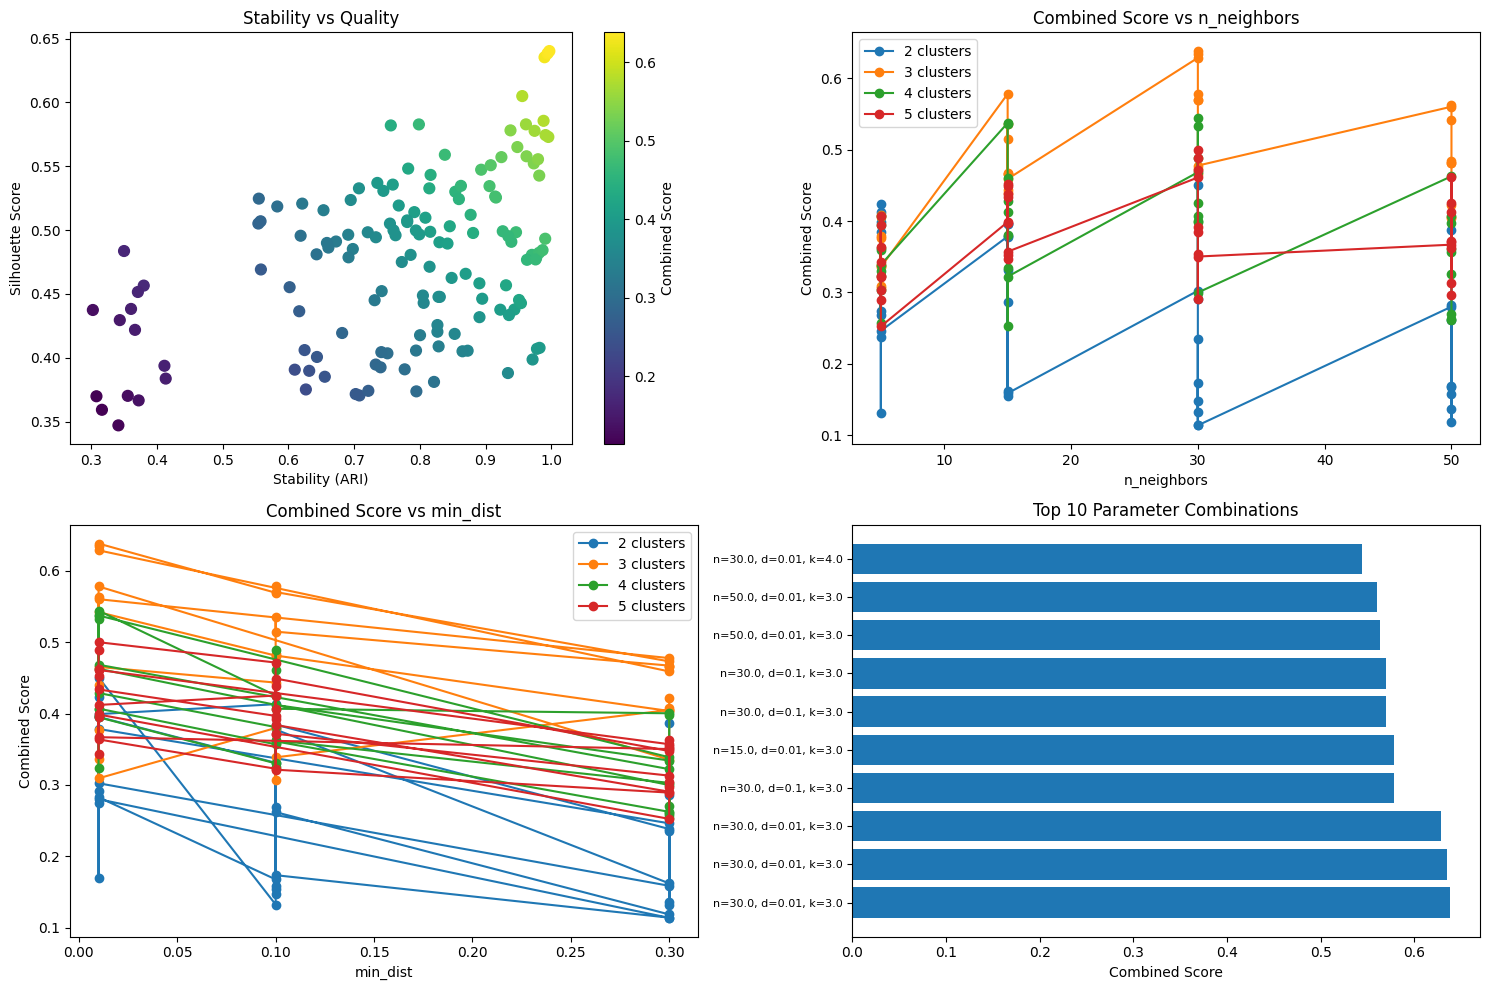


BEST PARAMETERS:
n_neighbors: 30.0
min_dist: 0.01
n_clusters: 3.0
Average silhouette: 0.640
Stability (ARI): 0.997

Testing best parameters 10 times...


/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/devoncallan/anaconda3/envs/cluster/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/devoncal

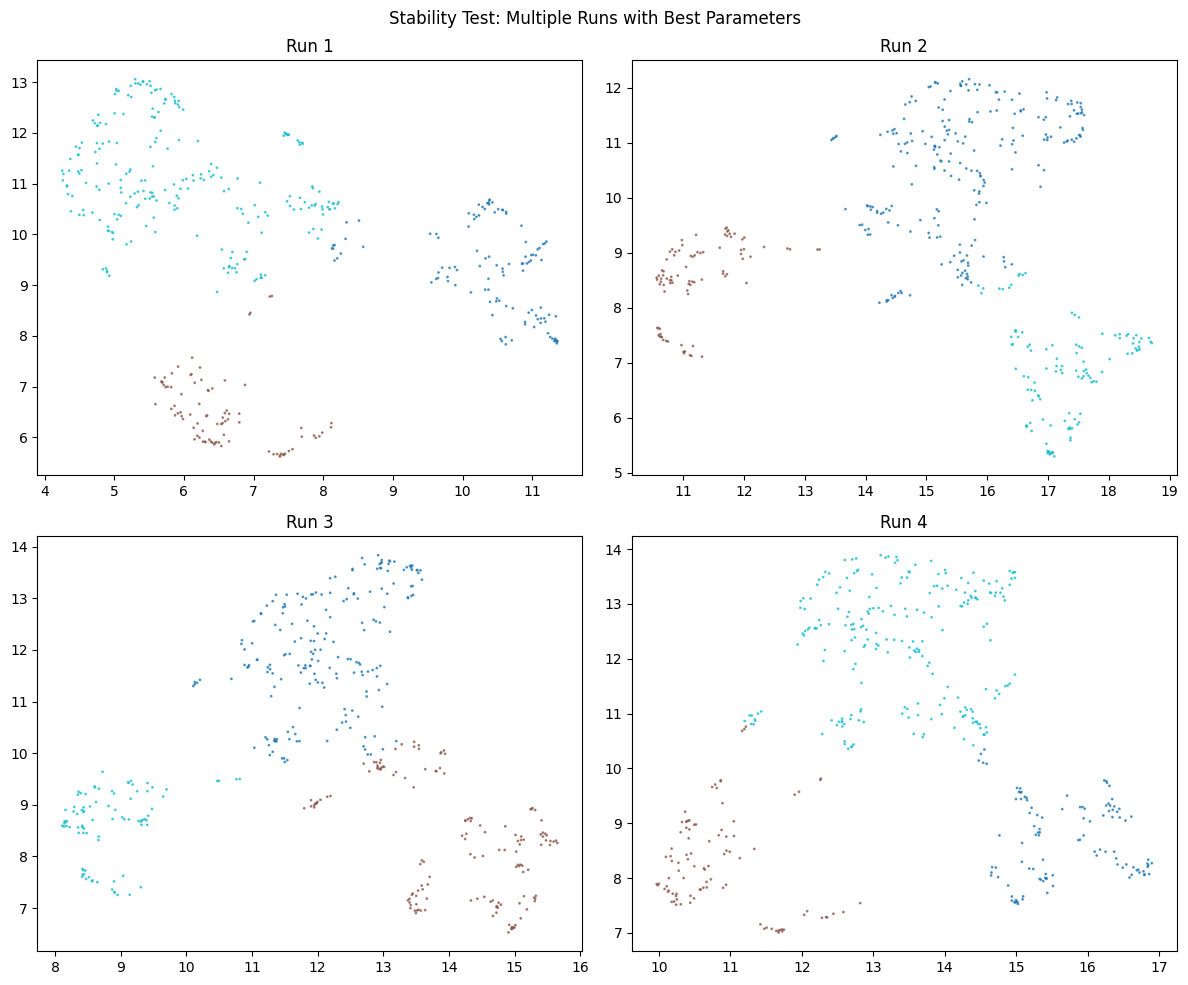

Final stability (ARI): 0.863 ± 0.084


KeyError: 'cluster'

<Figure size 1000x800 with 0 Axes>

In [2]:
df, X = get_data(channel=1)

from reduction.UMAP import tune_umap_clustering, test_best_params

results_df, best_params = tune_umap_clustering(X)
embeddings, labels = test_best_params(X, best_params)
# test_umap_clustering(df, X, n_components=10, n_clusters=3)

# Color + marker mapping
cluster_markers = {0: "*", 1: "s", 2: "^"}
gmp_color_map = {500: "#ffcccc", 1000: "#ff6666", 2000: "#cc0000", 2500: "#660000"}
tx_color_map = {0.5: "#cce6ff", 1.0: "#66b3ff", 2.5: "#0073e6", 5.0: "#003366"}

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for cluster_id in sorted(df["cluster"].unique()):
    marker = cluster_markers.get(cluster_id, "x")
    cluster_df = df[df["cluster"] == cluster_id]

    for _, row in cluster_df.iterrows():
        x, y = row["UMAP_X"], row["UMAP_Y"]
        name = row.get("stab_name", "")
        conc = row.get("stab_conc_uM", None)

        if name == "GMP" and conc in gmp_color_map:
            color = gmp_color_map[conc]
        elif name == "TX" and conc in tx_color_map:
            color = tx_color_map[conc]
        else:
            color = "gray"

        plt.scatter(x, y, color=color, marker=marker, alpha=0.8)

# Legend
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

legend_elements = (
    [
        mpatches.Patch(color=color, label=f"GMP {c} mM")
        for c, color in gmp_color_map.items()
    ]
    + [
        mpatches.Patch(color=color, label=f"TX {c} µM")
        for c, color in tx_color_map.items()
    ]
    + [
        Line2D(
            [0],
            [0],
            marker=mk,
            color="w",
            label=f"Cluster {cid}",
            markerfacecolor="gray",
            markersize=10,
            markeredgecolor="black",
        )
        for cid, mk in cluster_markers.items()
    ]
)

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-35, 35)
# plt.ylim(-35, 35)
# plt.title(f"K-Means Clustering (k={k_opt}) {title_suffix}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df